## 공공데이터를 이용한 카페 상권분석(2020 Ver.)


**들어가며**

- 공공데이터를 통해 대한민국을 이해해봅시다(?).
- 공공데이터포털(data.go.kr)에 다양한 데이터가 공개되어 있습니다.
- 그 중에 카페(라는 업종분류)들에 대해서 현황을 조사하려고 합니다.

**명세사항**
1. 전국 카페 데이터를 모두 수집해야합니다.
2. 지역별 or 브랜드별 점포 현황을 확인합니다.
3. 분석 결과를 시각화합니다. 



[데이터] https://www.data.go.kr/data/15012005/fileData.do

In [1]:
# 라이브러리를 불러옵니다.
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## 1. 데이터 불러오기

In [12]:
# 다운로드 받은 데이터중 일부를 열어봅니다.
temp= pd.read_csv("data/소상공인시장진흥공단_상가(상권)정보_서울_202106.csv")
temp.head(2)

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,17174175,비지트,NaN,Q,음식,Q01,한식,Q01A01,한식/백반/한정식,I56111,...,1165010100108540018009586,상랑의빌딩,서울특별시 서초구 동광로18길 82,137837,6572.0,NaN,1,NaN,126.991394,37.488375
1,17174119,쓰리에프,NaN,Q,음식,Q01,한식,Q01A01,한식/백반/한정식,I56111,...,1159010700101390073009536,NaN,서울특별시 동작구 동작대로27가길 12,156816,7008.0,NaN,NaN,NaN,126.980952,37.487105


In [9]:
# data 폴더에 있는 모든 csv 파일을 읽어오기 위해 glob을 사용합니다.
# 1. 위의 코드를 17번 반복해서 각각의 변수로 저장해서 노가다해도 됨
# 2. 한번에 불러오기(누적해서 합치는식으로)
from glob import glob

# csv 목록 불러오기
file_names = glob("data/*.csv") # 모든 파일명을 string으로 들어간 list가 됨
file_names

# 모든 csv 병합하기
total = pd.DataFrame()
for file_name in file_names:
    temp = pd.read_csv(file_name)  # 위에서 한번 확인해본 결과 별 다른 이상 없음. (구분자 sep = "|", endcoding='utf-8' 등)
    total = pd.concat([total,temp])

/Users/ppangppang/opt/anaconda3/envs/ppangppang/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (35) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [15]:
# 인덱스가 다 섞여 있음 reset index
total.reset_index(inplace=True)
total

,index,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,0,21706657,동경부동산,NaN,L,부동산,L01,부동산중개,L01A01,부동산중개,...,5013010100102900005031397,동문레코드,제주특별자치도 서귀포시 중앙로 70-1,697843.0,63591.0,NaN,NaN,NaN,126.561556,33.250877
1,1,17174231,에프케이알레그리아호텔제주,NaN,O,숙박,O01,호텔/콘도,O01A01,호텔/콘도,...,5013010100103190002000005,비스타케이호텔(천지연),제주특별자치도 서귀포시 중앙로47번길 25,697844.0,63592.0,NaN,NaN,NaN,126.559015,33.248179
2,2,15517264,금실홈패션,NaN,D,소매,D07,가정/주방/인테리어,D07A09,홈패션,...,5011010800101350009019203,서문공설시장,제주특별자치도 제주시 서문로4길 13-2,690819.0,63154.0,NaN,NaN,NaN,126.517956,33.511339
3,3,17175305,숙성1퍼센트,NaN,Q,음식,Q01,한식,Q01A01,한식/백반/한정식,...,5011012200137850003000001,NaN,제주특별자치도 제주시 노형10길 25,690805.0,63083.0,NaN,NaN,NaN,126.479894,33.483335
4,4,21633032,정아기획인쇄사,NaN,F,생활서비스,F12,광고/인쇄,F12A01,인쇄종합,...,5013010100103080021032900,명품치킨,제주특별자치도 서귀포시 서문로29번길 3,697844.0,63592.0,NaN,1.0,NaN,126.559047,33.250127
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2220895,85004,23458013,코사마트,NaN,D,소매,D03,종합소매점,D03A01,편의점,...,4313010300104800000001883,NaN,충청북도 충주시 성서7길 7,380020.0,27387.0,NaN,1,NaN,127.931611,36.969924
2220896,85005,21982802,린지네일,NaN,F,생활서비스,F01,이/미용/건강,F01A02,발/네일케어,...,4311112500109250000041012,NaN,충청북도 청주시 상당구 호미로198번길 2-2,360182.0,28749.0,NaN,NaN,NaN,127.516243,36.625750
2220897,85006,16985206,스테비아황칠토종백숙,NaN,Q,음식,Q05,닭/오리요리,Q05A01,삼계탕전문,...,4315011200102970019002246,NaN,충청북도 제천시 하소천길 188,390230.0,27156.0,NaN,NaN,NaN,128.191648,37.154688
2220898,85007,21895009,대원사료상회,NaN,D,소매,D25,기타판매업,D25A25,사료소매,...,4315010900101960013024305,NaN,충청북도 제천시 용두천로 64,390150.0,27183.0,NaN,1,NaN,128.209076,37.134382


In [20]:
# 분석에 필요한 column을 고릅니다. ## 자유롭게 하셔도 상관없습니다.
data = total[['상호명', '지점명', '상권업종대분류명','상권업종중분류명', '시도명', '시군구명','행정동명']]
data

,상호명,지점명,상권업종대분류명,상권업종중분류명,시도명,시군구명,행정동명
0,동경부동산,NaN,부동산,부동산중개,제주특별자치도,서귀포시,중앙동
1,에프케이알레그리아호텔제주,NaN,숙박,호텔/콘도,제주특별자치도,서귀포시,천지동
2,금실홈패션,NaN,소매,가정/주방/인테리어,제주특별자치도,제주시,용담1동
3,숙성1퍼센트,NaN,음식,한식,제주특별자치도,제주시,노형동
4,정아기획인쇄사,NaN,생활서비스,광고/인쇄,제주특별자치도,서귀포시,천지동
...,...,...,...,...,...,...,...
2220895,코사마트,NaN,소매,종합소매점,충청북도,충주시,성내.충인동
2220896,린지네일,NaN,생활서비스,이/미용/건강,충청북도,청주시 상당구,용암1동
2220897,스테비아황칠토종백숙,NaN,음식,닭/오리요리,충청북도,제천시,용두동
2220898,대원사료상회,NaN,소매,기타판매업,충청북도,제천시,화산동


In [ ]:
# 메모리 낭비를 막기 위해 필요없는 변수는 제거합니다.
del total
# total.head()  # 확인

## 2. 데이터 구경하기

#### 전국 커피 전문점 

In [ ]:
set(data['상권업종중분류명'])  # 커피점/카페

In [29]:
# 카페만 뽑아냅니다.
df_coffee = data[data['상권업종중분류명'] == '커피점/카페']
# index를 다시 세팅합니다.
df_coffee.index=range(len(df_coffee))

print("전국 커피 전문점 점포 수 : ", len(df_coffee))
df_coffee.head()

전국 커피 전문점 점포 수 :  108962


,상호명,지점명,상권업종대분류명,상권업종중분류명,시도명,시군구명,행정동명
0,나무,NaN,음식,커피점/카페,제주특별자치도,제주시,조천읍
1,한라카페테리아,NaN,음식,커피점/카페,제주특별자치도,제주시,아라동
2,팡,NaN,음식,커피점/카페,제주특별자치도,제주시,삼양동
3,커피마마,제주연동점,음식,커피점/카페,제주특별자치도,제주시,연동
4,카페다빈치제주점,제주점,음식,커피점/카페,제주특별자치도,제주시,노형동


#### 서울내 커피 전문점 

In [30]:
set(data['시도명'])

{'강원도',
 '경기도',
 '경상남도',
 '경상북도',
 '광주광역시',
 '대구광역시',
 '대전광역시',
 '부산광역시',
 '서울특별시',
 '세종특별자치시',
 '울산광역시',
 '인천광역시',
 '전라남도',
 '전라북도',
 '제주특별자치도',
 '충청남도',
 '충청북도'}

In [35]:
# 카페 중에 "서울"에 위치하고 있는 점포만 뽑아냅니다.
df_seoul_coffee = df_coffee[(df_coffee['시도명'] == '서울특별시')&(df_coffee['상권업종중분류명'] == '커피점/카페')]
df_seoul_coffee.index = range(len(df_seoul_coffee))
print('서울시 내 커피 전문점 점포 수 :', len(df_seoul_coffee))
df_seoul_coffee.head()

서울시 내 커피 전문점 점포 수 : 20832


,상호명,지점명,상권업종대분류명,상권업종중분류명,시도명,시군구명,행정동명
0,커피빈,코리아대학로대명거리점,음식,커피점/카페,서울특별시,종로구,혜화동
1,요거프레소,쌍문점,음식,커피점/카페,서울특별시,도봉구,쌍문2동
2,메머드커피,NaN,음식,커피점/카페,서울특별시,마포구,서교동
3,우성커피숍,NaN,음식,커피점/카페,서울특별시,양천구,신월4동
4,카페클럽,NaN,음식,커피점/카페,서울특별시,송파구,문정1동


#### 전국 스타벅스

In [44]:
# 이번엔 전국에 있는 스타벅스를 뽑아냅니다.
df_starbucks = df_coffee[df_coffee['상호명'].str.contains('스타벅스')]
df_starbucks.index = range(len(df_starbucks))
print('전국 스타벅스 점포 수 :', len(df_starbucks))
df_starbucks.head()

전국 스타벅스 점포 수 : 1545


,상호명,지점명,상권업종대분류명,상권업종중분류명,시도명,시군구명,행정동명
0,스타벅스,제주송악산점,음식,커피점/카페,제주특별자치도,서귀포시,대정읍
1,스타벅스,성산일출봉점,음식,커피점/카페,제주특별자치도,서귀포시,성산읍
2,스타벅스,신제주이마트점,음식,커피점/카페,제주특별자치도,제주시,노형동
3,스타벅스,제주칠성점,음식,커피점/카페,제주특별자치도,제주시,일도1동
4,스타벅스,제주용담DT점,음식,커피점/카페,제주특별자치도,제주시,용담2동


#### 서울 스타벅스

In [45]:
# 이번엔 서울에 있는 스타벅스를 뽑아냅니다.
df_seoul_starbucks = df_starbucks[df_starbucks["시도명"]=="서울특별시"]
df_seoul_starbucks.index = range(len(df_seoul_starbucks))
print('서울시 내 스타벅스 점포 수 :', len(df_seoul_starbucks))
df_seoul_starbucks.head()

서울시 내 스타벅스 점포 수 : 488


,상호명,지점명,상권업종대분류명,상권업종중분류명,시도명,시군구명,행정동명
0,스타벅스,동숭로아트점,음식,커피점/카페,서울특별시,종로구,이화동
1,스타벅스남부터미널2점,남부터미널2점,음식,커피점/카페,서울특별시,서초구,서초3동
2,스타벅스,당산점,음식,커피점/카페,서울특별시,영등포구,당산2동
3,스타벅스,가로수길점,음식,커피점/카페,서울특별시,강남구,신사동
4,스타벅스미아사거리역점,미아사거리역점,음식,커피점/카페,서울특별시,강북구,송중동


#### 전국 이디야

In [113]:
df_ediya = df_coffee[(df_coffee['상호명'].str.contains('이디야')) | (df_coffee['상호명'].str.contains('ediya'))]
df_ediya.reset_index(inplace=True)
print('전국 이디야 점포수 : ', len(df_ediya))
df_ediya.head()

전국 이디야 점포수 :  2100


,index,상호명,지점명,상권업종대분류명,상권업종중분류명,시도명,시군구명,행정동명
0,176,이디야커피제주중문점,제주중문점,음식,커피점/카페,제주특별자치도,서귀포시,예래동
1,578,이디야커피,에스프레소제주노형점,음식,커피점/카페,제주특별자치도,제주시,노형동
2,810,이디야커피,삼도점,음식,커피점/카페,제주특별자치도,제주시,삼도1동
3,844,이디야커피,제주한림점,음식,커피점/카페,제주특별자치도,제주시,한림읍
4,1142,이디야커피,제주화북점,음식,커피점/카페,제주특별자치도,제주시,화북동


#### 서울 이디야

In [114]:
df_seoul_ediya = df_ediya[df_ediya['시도명']=='서울특별시']
df_seoul_ediya.index = range(len(df_seoul_ediya))
print(f'서울 이디야 점포수 : {len(df_seoul_ediya)}')
df_seoul_ediya

서울 이디야 점포수 : 431


,index,상호명,지점명,상권업종대분류명,상권업종중분류명,시도명,시군구명,행정동명
0,76858,이디야커피,신길역점,음식,커피점/카페,서울특별시,영등포구,신길1동
1,76863,이디야커피,라이프점,음식,커피점/카페,서울특별시,영등포구,여의동
2,76898,이디야커피양재AT점,양재AT점,음식,커피점/카페,서울특별시,서초구,양재2동
3,76909,이디야커피,시흥점,음식,커피점/카페,서울특별시,금천구,시흥2동
4,76984,이디야커피,개봉중앙점,음식,커피점/카페,서울특별시,구로구,개봉3동
...,...,...,...,...,...,...,...,...
426,97064,이디야커피,장한평군자초교점,음식,커피점/카페,서울특별시,동대문구,장안1동
427,97180,이디야커피,강남율현점,음식,커피점/카페,서울특별시,강남구,세곡동
428,97227,이디야커피,신사동고개삼거리점,음식,커피점/카페,서울특별시,은평구,신사1동
429,97387,이디야커피,양원역점,음식,커피점/카페,서울특별시,중랑구,망우본동


#### 전국 커피빈 

In [115]:
df_coffeebean = df_coffee[(df_coffee['상호명']==('커피빈')) |  (df_coffee['상호명'].str.contains('coffeebean'))]
df_coffeebean.index = range(len(df_coffeebean))
print(len(df_coffeebean))
df_coffeebean

201


,상호명,지점명,상권업종대분류명,상권업종중분류명,시도명,시군구명,행정동명
0,커피빈,코리아제주아라점,음식,커피점/카페,제주특별자치도,제주시,아라동
1,커피빈,부산무역센터점,음식,커피점/카페,부산광역시,중구,중앙동
2,커피빈,코리아해운대한화콘도앞점,음식,커피점/카페,부산광역시,해운대구,우1동
3,커피빈,코리아부산화명수정역점,음식,커피점/카페,부산광역시,북구,화명1동
4,커피빈,코리아부산서면서전로점,음식,커피점/카페,부산광역시,부산진구,부전2동
...,...,...,...,...,...,...,...
196,커피빈,코리아청주점,음식,커피점/카페,충청북도,청주시 상당구,성안동
197,커피빈,NaN,음식,커피점/카페,충청북도,제천시,교동
198,커피빈,NaN,음식,커피점/카페,충청북도,제천시,중앙동
199,커피빈,NaN,음식,커피점/카페,충청북도,제천시,영서동


#### 서울 커피빈 

In [116]:
df_seoul_coffeebean = df_coffeebean[df_coffeebean['시도명']=='서울특별시']
df_seoul_coffeebean.index=range(len(df_seoul_coffeebean))
df_seoul_coffeebean

,상호명,지점명,상권업종대분류명,상권업종중분류명,시도명,시군구명,행정동명
0,커피빈,코리아대학로대명거리점,음식,커피점/카페,서울특별시,종로구,혜화동
1,커피빈,코리아강남역랭기지타워점,음식,커피점/카페,서울특별시,강남구,역삼1동
2,커피빈,코리아청담성당점,음식,커피점/카페,서울특별시,강남구,청담동
3,커피빈,코리아청담에스점,음식,커피점/카페,서울특별시,강남구,청담동
4,커피빈,코리아청담카페점,음식,커피점/카페,서울특별시,강남구,청담동
...,...,...,...,...,...,...,...
110,커피빈,코리아서초동점,음식,커피점/카페,서울특별시,서초구,서초3동
111,커피빈,코리아신촌현대백화점점,음식,커피점/카페,서울특별시,서대문구,신촌동
112,커피빈,코리아을지로입구역점,음식,커피점/카페,서울특별시,중구,명동
113,커피빈,길동별,음식,커피점/카페,서울특별시,강동구,길동


#### 전국 투썸 

In [117]:
df_2some = df_coffee[(df_coffee['상호명'].str.contains('투썸'))|(df_coffee['상호명'].str.contains('twosome'))]
df_2some.index = range(len(df_2some))
df_2some

,상호명,지점명,상권업종대분류명,상권업종중분류명,시도명,시군구명,행정동명
0,투썸플레이스,애월점,음식,커피점/카페,제주특별자치도,제주시,애월읍
1,투썸플레이스,도두해안도로점,음식,커피점/카페,제주특별자치도,제주시,도두동
2,투썸플레이스,제주쇠소깍점,음식,커피점/카페,제주특별자치도,서귀포시,효돈동
3,투썸플레이스,제주신화빌라점,음식,커피점/카페,제주특별자치도,서귀포시,안덕면
4,투썸플레이스한라대점,한라대점,음식,커피점/카페,제주특별자치도,제주시,노형동
...,...,...,...,...,...,...,...
1056,투썸플레이스,신봉네거리점,음식,커피점/카페,충청북도,청주시 흥덕구,운천.신봉동
1057,투썸플레이스,비하점,음식,커피점/카페,충청북도,청주시 흥덕구,강서1동
1058,투썸플레이스,청주예술의전당DT점,음식,커피점/카페,충청북도,청주시 흥덕구,봉명1동
1059,투썸플레이스,씨제이비센터점,음식,커피점/카페,충청북도,청주시 서원구,산남동


#### 서울 투썸 

In [118]:
df_seoul_2some = df_2some[df_2some['시도명']=='서울특별시']
df_seoul_2some.index=range(len(df_seoul_2some))
df_seoul_2some

,상호명,지점명,상권업종대분류명,상권업종중분류명,시도명,시군구명,행정동명
0,투썸플레이스,서울타워점,음식,커피점/카페,서울특별시,용산구,용산2가동
1,투썸플레이스서울대역중앙점,서울대역중앙점,음식,커피점/카페,서울특별시,관악구,중앙동
2,투썸플레이스,씨제이프레시웨이강남세브란스병원점,음식,커피점/카페,서울특별시,강남구,도곡1동
3,투썸플레이스,LG광화문빌딩점,음식,커피점/카페,서울특별시,종로구,사직동
4,투썸플레이스,가락시장역점,음식,커피점/카페,서울특별시,송파구,가락본동
...,...,...,...,...,...,...,...
248,투썸플레이스,선릉로점,음식,커피점/카페,서울특별시,강남구,역삼1동
249,투썸플레이스,구로항동점,음식,커피점/카페,서울특별시,구로구,항동
250,투썸플레이스,발산W타워점,음식,커피점/카페,서울특별시,강서구,발산1동
251,투썸플레이스,숙대입구역점,음식,커피점/카페,서울특별시,용산구,남영동


#### 전국 빽다방 

In [119]:
df_bbaek = df_coffee[df_coffee['상호명'].str.contains('빽다방')]
df_bbaek.index = range(len(df_bbaek))
df_bbaek

,상호명,지점명,상권업종대분류명,상권업종중분류명,시도명,시군구명,행정동명
0,빽다방,서귀포시청점,음식,커피점/카페,제주특별자치도,서귀포시,서홍동
1,빽다방,제주외도점,음식,커피점/카페,제주특별자치도,제주시,외도동
2,빽다방,탐라도서관점,음식,커피점/카페,제주특별자치도,제주시,노형동
3,빽다방,호텔더본제주점,음식,커피점/카페,제주특별자치도,서귀포시,예래동
4,빽다방,제주대학로점,음식,커피점/카페,제주특별자치도,제주시,이도2동
...,...,...,...,...,...,...,...
603,빽다방,충북대중문점,음식,커피점/카페,충청북도,청주시 서원구,사창동
604,빽다방,서원대점,음식,커피점/카페,충청북도,청주시 서원구,모충동
605,빽다방,진천점,음식,커피점/카페,충청북도,진천군,진천읍
606,빽다방,청주강서점,음식,커피점/카페,충청북도,청주시 흥덕구,강서1동


#### 서울 빽다방 

In [120]:
df_seoul_bbaek = df_bbaek[df_bbaek['시도명']=='서울특별시']
df_seoul_bbaek.index = range(len(df_seoul_bbaek))
df_seoul_bbaek

,상호명,지점명,상권업종대분류명,상권업종중분류명,시도명,시군구명,행정동명
0,빽다방공덕새창로점,공덕새창로점,음식,커피점/카페,서울특별시,마포구,도화동
1,빽다방서초우성점,서초우성점,음식,커피점/카페,서울특별시,서초구,서초2동
2,빽다방중계은행사거리점,중계은행사거리점,음식,커피점/카페,서울특별시,노원구,중계1동
3,빽다방성신여대점,성신여대점,음식,커피점/카페,서울특별시,성북구,동선동
4,빽다방신림역1호점,신림역1호점,음식,커피점/카페,서울특별시,관악구,서원동
...,...,...,...,...,...,...,...
121,빽다방,화양사거리점,음식,커피점/카페,서울특별시,성동구,성수2가3동
122,빽다방,강동구청점,음식,커피점/카페,서울특별시,강동구,성내1동
123,빽다방,홍대거리점,음식,커피점/카페,서울특별시,마포구,서교동
124,빽다방,신용산해링턴점,음식,커피점/카페,서울특별시,용산구,한강로동


#### 전국 할리스 

In [121]:
df_hollys = df_coffee[(df_coffee['상호명'].str.contains('할리스'))|(df_coffee['상호명'].str.contains('hollys'))]
df_hollys.index = range(len(df_hollys))
df_hollys

,상호명,지점명,상권업종대분류명,상권업종중분류명,시도명,시군구명,행정동명
0,할리스커피,협재해수욕장점,음식,커피점/카페,제주특별자치도,제주시,한림읍
1,할리스커피,제주이도점,음식,커피점/카페,제주특별자치도,제주시,아라동
2,할리스커피,세종가람DT점,음식,커피점/카페,세종특별자치시,세종특별자치시,한솔동
3,할리스커피,세종어반아트리움점,음식,커피점/카페,세종특별자치시,세종특별자치시,새롬동
4,할리스커피,세종시청점,음식,커피점/카페,세종특별자치시,세종특별자치시,한솔동
...,...,...,...,...,...,...,...
617,할리스커피,괴산휴게소창원방면,음식,커피점/카페,충청북도,괴산군,장연면
618,할리스,명암레이크,음식,커피점/카페,충청북도,청주시 상당구,용담.명암.산성동
619,할리스커피,청주NC백화점CGV점,음식,커피점/카페,충청북도,청주시 흥덕구,가경동
620,할리스커피,청주성모병원점,음식,커피점/카페,충청북도,청주시 청원구,오근장동


#### 서울 할리스 

In [122]:
df_seoul_hollys = df_hollys[df_hollys['시도명']=='서울특별시']
df_seoul_hollys.index = range(len(df_seoul_hollys))
df_seoul_hollys

,상호명,지점명,상권업종대분류명,상권업종중분류명,시도명,시군구명,행정동명
0,할리스커피남부터미널,NaN,음식,커피점/카페,서울특별시,서초구,서초1동
1,할리스,백석예술대점,음식,커피점/카페,서울특별시,서초구,방배3동
2,할리스커피마포역점,마포역점,음식,커피점/카페,서울특별시,마포구,용강동
3,할리스커피,목동예술인회관점,음식,커피점/카페,서울특별시,양천구,목1동
4,할리스커피,르네상스사거리점,음식,커피점/카페,서울특별시,강남구,역삼2동
...,...,...,...,...,...,...,...
158,할리스,방이역점,음식,커피점/카페,서울특별시,송파구,오금동
159,할리스,종로본점,음식,커피점/카페,서울특별시,종로구,종로1.2.3.4가동
160,할리스커피,장한평역점,음식,커피점/카페,서울특별시,성동구,용답동
161,할리스,태능입구역점,음식,커피점/카페,서울특별시,노원구,공릉1동


#### 전국 메가커피

In [123]:
df_mega = df_coffee[(df_coffee['상호명'].str.contains('메가'))|(df_coffee['상호명'].str.contains('mega'))]
df_mega.index = range(len(df_mega))
df_mega

,상호명,지점명,상권업종대분류명,상권업종중분류명,시도명,시군구명,행정동명
0,메가커피,제주일도점,음식,커피점/카페,제주특별자치도,제주시,일도2동
1,메가커피,제주도청점,음식,커피점/카페,제주특별자치도,제주시,연동
2,메가엠지씨커피,제주한라대점,음식,커피점/카페,제주특별자치도,제주시,노형동
3,메가엠지씨커피,제주아라점,음식,커피점/카페,제주특별자치도,제주시,아라동
4,메가엠지씨커피,제주남원점,음식,커피점/카페,제주특별자치도,서귀포시,남원읍
...,...,...,...,...,...,...,...
1169,메가엠지씨커피,충북증평점,음식,커피점/카페,충청북도,증평군,증평읍
1170,메가엠지씨커피,공단오거리점,음식,커피점/카페,충청북도,청주시 흥덕구,복대2동
1171,메가엠지씨커피,청주하복대점,음식,커피점/카페,충청북도,청주시 흥덕구,복대1동
1172,메가엠지씨커피청주동남지구점,NaN,음식,커피점/카페,충청북도,청주시 상당구,용암1동


#### 서울 메가커피 

In [124]:
df_seoul_mega = df_mega[df_mega['시도명']=='서울특별시']
df_seoul_mega.index = range(len(df_seoul_mega))
df_seoul_mega

,상호명,지점명,상권업종대분류명,상권업종중분류명,시도명,시군구명,행정동명
0,메가커피미아,수유시장점,음식,커피점/카페,서울특별시,강북구,미아동
1,메가커피,아차산역점,음식,커피점/카페,서울특별시,광진구,중곡4동
2,메가커피,NaN,음식,커피점/카페,서울특별시,동대문구,용신동
3,메가커피,NaN,음식,커피점/카페,서울특별시,금천구,가산동
4,메가엠지씨커피,강동구청점,음식,커피점/카페,서울특별시,강동구,성내1동
...,...,...,...,...,...,...,...
221,메가엠지씨커피홍제,홍은벽산점,음식,커피점/카페,서울특별시,서대문구,홍은1동
222,메가엠지씨커피,구로궁동점,음식,커피점/카페,서울특별시,구로구,수궁동
223,메가엠지씨커피,도봉중앙점,음식,커피점/카페,서울특별시,도봉구,도봉1동
224,메가엠지씨커피,성신여대점,음식,커피점/카페,서울특별시,성북구,동선동


## 3. 커피전문점 별 비율 비교하기 (주요 브랜드 위주로)

**2020년 12월 기준 커피전문점 평판 순위**


(source : https://www.futurekorea.co.kr/news/articleView.html?idxno=125637)

1. 스타벅스
2. 투썸플레이스
3. 이디야
4. 메가커피
5. 커피빈

**변수**

- 전체 점포 : data
- 전체/서울 커피전문점 : df_coffee / df_seoul_starbucks



- 전체/서울 스타벅스 : df_starbucks / df_seoul_starbucks
- 전체/서울 이디야 : df_ediya / df_seoul_ediya
- 전체/서울 커피빈 : df_coffeebean / df_seoul_coffeebean
- 전체/서울 투썸플레이스 : df_2some / df_seoul_2some
- 전체/서울 빽다방 : df_bbaek / df_seoul_bbaek
- 전체/서울 할리스 : df_hollys / df_seoul_hollys
- 전체/서울 메가커피 : df_mega / df_seoul_mega

### 1) 전체 커피전문점 내 주요 커피브랜드 입점 비율 

In [161]:
print("**** 전국 커피전문점중 주요 5대 커피브랜드 입점 비율 ****")
print(f" 주요 5대 커피브랜드 전국 입점 비율 :\
    {(len(df_starbucks)+len(df_2some)+len(df_ediya)+len(df_mega)+len(df_coffeebean))/len(df_coffee) *100 : .3f}%")

print(f"1. 스타벅스 : {len(df_starbucks)/len(df_coffee)*100: .3f}%")
print(f"2. 투썸플레이스 : {len(df_2some)/len(df_coffee)*100: .3f}%")
print(f"3. 이디야 : {len(df_ediya)/len(df_coffee)*100: .3f}%")
print(f"4. 메가커피 : {len(df_mega)/len(df_coffee)*100: .3f}%")
print(f"5. 커피빈 : {len(df_coffeebean)/len(df_coffee)*100: .3f}%")

**** 전국 커피전문점중 주요 5대 커피브랜드 입점 비율 ****
 주요 5대 커피브랜드 전국 입점 비율 :     5.581%
1. 스타벅스 :  1.418%
2. 투썸플레이스 :  0.974%
3. 이디야 :  1.927%
4. 메가커피 :  1.077%
5. 커피빈 :  0.184%


### 2) 서울 커피전문점 내 주요 커피브랜드 입점 비율 

In [164]:
print(f"스타벅스 : {len(df_seoul_starbucks) / len(df_seoul_coffee)*100 : .3f}%")
# print("이디야 : %.3f%%" % )
# print("커피빈 : %.3f%%" % )
# print("투썸플레이스 : %.3f%%" % )
# print("빽다방 : %.3f%%" % )
# print("할리스 : %.3f%%" % )
# print("메가커피 : %.3f%%" % )

스타벅스 :  2.343%


### 3) 각 커피브랜드별 서울 입점 비율 

In [172]:
print("**** 주요 5대 커피브랜드별 서울 입점 비율 ****")
print(f"1. 스타벅스 : {len(df_seoul_starbucks)/len(df_starbucks)*100:.3f}%" )
print(f"2. 투썸플레이스 : {len(df_seoul_2some)/len(df_2some)*100:.3f}%" )
print(f"3. 이디야 :  {len(df_seoul_ediya)/len(df_ediya)*100:.3f}%" )
print(f"4. 메가커피 : {len(df_seoul_mega)/len(df_mega)*100:.3f}%" )
print(f"5. 커피빈 :  {len(df_seoul_coffeebean)/len(df_coffeebean)*100:.3f}%" )

**** 주요 5대 커피브랜드별 서울 입점 비율 ****
1. 스타벅스 : 31.586%
2. 투썸플레이스 : 23.845%
3. 이디야 :  20.524%
4. 메가커피 : 19.250%
5. 커피빈 :  57.214%


In [ ]:
# 각 구별로 스타벅스가 얼마나 있는지 확인합니다.
starbucks_gu = df_seoul_starbucks.groupby('시군구명')['상호명'].count().to_frame().sort_values(by='상호명', ascending=False)
starbucks_gu = starbucks_gu.reset_index()
starbucks_gu = starbucks_gu.set_index('시군구명')
starbucks_gu

In [166]:
# 시각화를 위한 라이브러리를 불러옵니다.
import seaborn as sns
import matplotlib.pyplot as plt
import platform

from matplotlib import font_manager, rc
%matplotlib inline

In [169]:
#### Windows10 사용자는 해당 코드가 필요없습니다!

# macos에서 사용가능한 한글 글꼴 확인 코드
[f.name for f in font_manager.fontManager.ttflist if 'Neo' in f.name]

['Apple SD Gothic Neo']

In [168]:
## 운영체제별 글꼴 세팅

path = "c:/Windows/Fonts/malgun.ttf"
if platform.system() == 'Darwin':
    font_name = 'Apple SD Gothic Neo'
    rc('font', family='Apple SD Gothic Neo')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    font_name = font_manager.FontProperties(fname="/usr/share/fonts/nanumfont/NanumGothic.ttf")
    rc('font', family="NanumGothic")

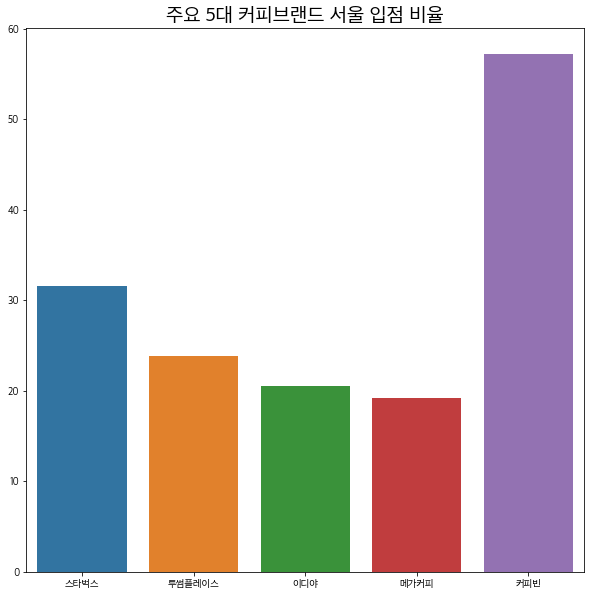

In [176]:
# 주요 5대 커피브랜드 서울 입점 비율을 시각화합니다.
starbucks_rate = (len(df_seoul_starbucks)/len(df_starbucks)*100)
twosome_rate = (len(df_seoul_2some)/len(df_2some)*100)
ediya_rate = (len(df_seoul_ediya)/len(df_ediya)*100)
mega_rate = (len(df_seoul_mega)/len(df_mega)*100)
coffebean_rate = (len(df_seoul_coffeebean)/len(df_coffeebean)*100)

x = ["스타벅스","투썸플레이스","이디야","메가커피","커피빈"]
y = [starbucks_rate, twosome_rate, ediya_rate, mega_rate, coffebean_rate]

plt.figure(figsize=(10,10))
plt.title("주요 5대 커피브랜드 서울 입점 비율", fontdict={"fontsize" :20})
sns.barplot(x=x,y=y)
plt.savefig("coffee_barplot.png")
plt.show()

### (Challenge) More Prettier!

In [ ]:
# 위의 barplot을 seaborn을 이용하여 더욱 멋지게 시각화해보세요!